# Foreword

For the purpose of Data Science Special Syllabus Report, I am going to use the data from Robot Field for the year 2020. Following is a summary of the field and the dates when the data was collected from the field.


Date of data collections  
Subvplots in the field  
Distribution of dates in the season  
Days to heading  
Days to maturity  
Sowing dates  

# Preprocessing

In [1]:
%%time

import pandas as pd
import numpy as np
import math
import os
import datetime
from copy import copy
import pprint # pretty print
import time

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',50)

Wall time: 3.23 s


In [2]:
# Prints the current workinig directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\Documents\\GitHub\\vPheno\\DS Special Syllabus Report\\Code'

## Importing Data

In [3]:
path = './Data/'
list_data = os.listdir(path)
os.listdir(path)

['Robot_2020_mean_fixed_rows.csv',
 'Robot_2020_median_fixed_rows.csv',
 'Robot_2020_stdev_fixed_rows.csv',
 'Robot_fixed_cols.csv']

In [4]:
import_data = []
for csv_data in list_data:
    df_name = csv_data[:-4]
    import_data.append(df_name)
    
    locals()[df_name] = pd.read_csv(path+csv_data)
    print(df_name, '=====', locals()[df_name].shape)
    

Robot_2020_mean_fixed_rows ===== (96, 100)
Robot_2020_median_fixed_rows ===== (96, 100)
Robot_2020_stdev_fixed_rows ===== (96, 100)
Robot_fixed_cols ===== (1344, 26)


In [5]:
Robot_fixed_cols 

,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,NDVI_Mean_Value,NDVI_Median_Value,NDVI_Std_Dev_Value,MTCI_Mean_Value,MTCI_Median_Value,MTCI_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity,Date
0,1101,0.022459,0.021905,0.004297,0.052765,0.051635,0.009473,0.028500,0.028147,0.004371,0.144346,0.142298,0.021075,0.467603,0.465755,0.053853,0.884827,0.885390,0.014203,2.815468,2.803551,0.255095,453.658537,62,109,2020-07-01
1,1102,0.028519,0.028108,0.005220,0.056449,0.055910,0.008966,0.035211,0.035009,0.004360,0.145996,0.145149,0.019667,0.460994,0.458687,0.054826,0.857613,0.858816,0.012931,2.861839,2.861652,0.215243,439.024390,62,113,2020-07-01
2,1103,0.027263,0.026808,0.005350,0.057720,0.057188,0.009580,0.034694,0.034401,0.004216,0.150859,0.149912,0.021247,0.470922,0.468715,0.058114,0.862241,0.863303,0.011909,2.774859,2.768063,0.195096,409.756098,60,106,2020-07-01
3,1104,0.025344,0.024750,0.005197,0.049188,0.048598,0.008832,0.030831,0.030623,0.004083,0.132769,0.131659,0.019817,0.458368,0.455760,0.059065,0.873491,0.874434,0.011828,3.220941,3.206094,0.262166,474.796748,61,110,2020-07-01
4,1105,0.029858,0.029282,0.006135,0.060236,0.059577,0.010768,0.036324,0.035984,0.005101,0.154584,0.153574,0.022699,0.474612,0.473269,0.058084,0.857726,0.858489,0.010960,2.727793,2.720606,0.200560,411.382114,61,106,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1808,0.034856,0.033788,0.008293,0.064283,0.062602,0.015599,0.087138,0.084690,0.020343,0.156042,0.153530,0.033405,0.253067,0.250196,0.043123,0.491482,0.490993,0.039935,1.450426,1.428498,0.226095,429.268293,61,105,2020-07-30
1340,1809,0.026307,0.025289,0.006062,0.055868,0.053867,0.013636,0.067937,0.065721,0.015526,0.150482,0.147120,0.031206,0.271998,0.267604,0.046419,0.601984,0.601344,0.042863,1.504835,1.501041,0.187776,414.634146,60,102,2020-07-30
1341,1810,0.035488,0.034920,0.008101,0.068913,0.067794,0.016798,0.077794,0.076857,0.017368,0.163929,0.162150,0.034949,0.283251,0.280264,0.048721,0.570859,0.569404,0.043436,1.427765,1.406162,0.223097,460.162602,62,107,2020-07-30
1342,1811,0.033889,0.032249,0.009557,0.062838,0.059999,0.018540,0.084369,0.080487,0.023713,0.151743,0.146993,0.038770,0.242731,0.236998,0.047401,0.489784,0.487644,0.051395,1.414631,1.384678,0.276493,443.902439,62,105,2020-07-30


In [6]:
comments = []

# Data Trends Visualisation

## ToDo: Identify Dates and index with problems

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Cleanup  
Remove dates which have drop  

## ToDo: Remove outliers

# Model Training

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance

In [8]:
df = Robot_fixed_cols.copy()
comments.append('Robot_fixed_cols dataset.')
comments.append(str(Robot_fixed_cols.shape))
comments.append('All data stacked on top of each other.')
df

,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,NDVI_Mean_Value,NDVI_Median_Value,NDVI_Std_Dev_Value,MTCI_Mean_Value,MTCI_Median_Value,MTCI_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity,Date
0,1101,0.022459,0.021905,0.004297,0.052765,0.051635,0.009473,0.028500,0.028147,0.004371,0.144346,0.142298,0.021075,0.467603,0.465755,0.053853,0.884827,0.885390,0.014203,2.815468,2.803551,0.255095,453.658537,62,109,2020-07-01
1,1102,0.028519,0.028108,0.005220,0.056449,0.055910,0.008966,0.035211,0.035009,0.004360,0.145996,0.145149,0.019667,0.460994,0.458687,0.054826,0.857613,0.858816,0.012931,2.861839,2.861652,0.215243,439.024390,62,113,2020-07-01
2,1103,0.027263,0.026808,0.005350,0.057720,0.057188,0.009580,0.034694,0.034401,0.004216,0.150859,0.149912,0.021247,0.470922,0.468715,0.058114,0.862241,0.863303,0.011909,2.774859,2.768063,0.195096,409.756098,60,106,2020-07-01
3,1104,0.025344,0.024750,0.005197,0.049188,0.048598,0.008832,0.030831,0.030623,0.004083,0.132769,0.131659,0.019817,0.458368,0.455760,0.059065,0.873491,0.874434,0.011828,3.220941,3.206094,0.262166,474.796748,61,110,2020-07-01
4,1105,0.029858,0.029282,0.006135,0.060236,0.059577,0.010768,0.036324,0.035984,0.005101,0.154584,0.153574,0.022699,0.474612,0.473269,0.058084,0.857726,0.858489,0.010960,2.727793,2.720606,0.200560,411.382114,61,106,2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1808,0.034856,0.033788,0.008293,0.064283,0.062602,0.015599,0.087138,0.084690,0.020343,0.156042,0.153530,0.033405,0.253067,0.250196,0.043123,0.491482,0.490993,0.039935,1.450426,1.428498,0.226095,429.268293,61,105,2020-07-30
1340,1809,0.026307,0.025289,0.006062,0.055868,0.053867,0.013636,0.067937,0.065721,0.015526,0.150482,0.147120,0.031206,0.271998,0.267604,0.046419,0.601984,0.601344,0.042863,1.504835,1.501041,0.187776,414.634146,60,102,2020-07-30
1341,1810,0.035488,0.034920,0.008101,0.068913,0.067794,0.016798,0.077794,0.076857,0.017368,0.163929,0.162150,0.034949,0.283251,0.280264,0.048721,0.570859,0.569404,0.043436,1.427765,1.406162,0.223097,460.162602,62,107,2020-07-30
1342,1811,0.033889,0.032249,0.009557,0.062838,0.059999,0.018540,0.084369,0.080487,0.023713,0.151743,0.146993,0.038770,0.242731,0.236998,0.047401,0.489784,0.487644,0.051395,1.414631,1.384678,0.276493,443.902439,62,105,2020-07-30


In [9]:
# ToDo: Add check for duplicate columns in the df

# list_agg_df
yield_cols = ['GrainYield', 'Days2Heading', 'Days2Maturity']
id_cols_new = ['Plot_ID']

# Counter for location of column in columns list
loc = 0

# Dict for saving the name and location of the yield column
loc_yield_cols = {}

for cols in df.columns.tolist():
    for y_col in yield_cols:
        if not cols.find(y_col):
            loc_yield_cols[cols] = loc
            print(f'\"{cols}\" column in df seems like the yield column as it contains the text \"{y_col}\". It is located at location {loc}')
    loc += 1

yield_cols_found = list(loc_yield_cols.keys())
target_cols=yield_cols_found[0]

# # Droping yield columns, i.e. target variables and Plot_ID column
# Robot_2020_all.drop(columns = yield_cols_found+id_cols_new)
# Robot_2020_all[yield_cols_found]




"GrainYield" column in df seems like the yield column as it contains the text "GrainYield". It is located at location 22
"Days2Heading" column in df seems like the yield column as it contains the text "Days2Heading". It is located at location 23
"Days2Maturity" column in df seems like the yield column as it contains the text "Days2Maturity". It is located at location 24


In [10]:
%time

#==============================================================================
# Split dataframe into data and target
#==============================================================================

temp_X = df.drop(columns = yield_cols_found)
y = df[target_cols].values.flatten()
comments.append('Drop Days2Heading and Days2Maturity features.')
comments.append('Target variable is GrainYield.')
y.shape

Wall time: 0 ns


(1344,)

In [11]:
# Using one hot encoder to encode the dates and plot id

from sklearn.preprocessing import OneHotEncoder
dates = temp_X.iloc[:,[-1]]

enc1 = OneHotEncoder()
enc_dates = enc1.fit_transform(dates).toarray()
enc_dates


plot_id = temp_X.iloc[:,[0]]

enc2 = OneHotEncoder()
enc_id = enc2.fit_transform(plot_id).toarray()
enc_id

comments.append('One hot encoding for Date and Plot_ID.')


In [12]:
# Merging the encoded dates and encoded plot ids with the rest of the 
# dataframe, after dropping the respective original columns

X = np.concatenate((temp_X.drop(columns=['Plot_ID','Date']).values, enc_id, enc_dates), axis=1)

comments.append('Concetenate Plot_ID and Date one hot encoded columns in the end.')
comments.append('Plot_ID encoded shape '+str(enc_id.shape))
comments.append('Date encoded shape '+str(enc_dates.shape))

X.shape

(1344, 131)

In [31]:
%time

from sklearn.model_selection import train_test_split

#==============================================================================
# Create separate train/test splits from Main data
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=5)

comments.append('Test train split. test_Size=0.3, random_state=55')

Wall time: 0 ns


In [32]:
%time

from sklearn.preprocessing import StandardScaler

#==============================================================================
# Scale features using StandardScaler class in scikit-learn 
#==============================================================================

# Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and STD from
# training data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

comments.append('Standard scaler fit transform.')

Wall time: 0 ns


In [33]:
%time

#==============================================================================
# Defining the function to vaiidate the model with the test data and 
# get the results from regression evaluation metrices in sklearn
#==============================================================================
pred = []
acc = []
def test_data_regression(model):
    pred = []
    accuracy = {}
    #==============================================================================
    # Make predictions for test set
    #==============================================================================

    # Predict classes for samples in test set
    y_pred = model.predict(X_test)
    
    #==============================================================================
    # Compute performance
    #==============================================================================
    
    from sklearn.metrics import max_error
    me = max_error(y_test, y_pred)
    print(me, 'max_error')
#     accuracy.append(me)
    accuracy['Max Error'] = me

    from sklearn.metrics import mean_absolute_error
    mae = mean_absolute_error(y_test, y_pred)
    print(mae, ' mean_absolute_error')
#     accuracy.append(mae)
    accuracy['MAE'] = mae

    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(rmse, ' root_mean_squared_error')
#     accuracy.append(rmse)
    accuracy['RMSE'] = rmse

    from sklearn.metrics import r2_score
    r2 = r2_score(y_test, y_pred)
    print(r2, ' r2_score')
    accuracy['R2 Score'] = r2

    acc.append(accuracy)
    # Print accuracy computed from predictions on the test set
    pp = pprint.PrettyPrinter(indent=4, width=80, depth=None, stream=None, compact=True, sort_dicts=False)
    pp.pprint(accuracy)
    
    #==============================================================================
    # Append Results
    #==============================================================================
    results = []
    import datetime
    datetime = datetime.datetime.now()
    results.append(np.concatenate((np.array((model, me, mae, rmse, r2, accuracy, datetime), dtype=object), np.array(comments))))
#     results.extend(np.array(comments)) 
    print(results)
    pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                             mode='a',
                                             header=None)
    pred.extend(y_pred)

Wall time: 0 ns


In [34]:
%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)
# model = RandomForestRegressor(n_estimators = 50, max_depth=100, min_samples_split=400, random_state=0, n_jobs = -1)
model.fit(X_train, y_train)

test_data_regression(model)

Wall time: 0 ns
187.0148058521997 max_error
42.14294728840248  mean_absolute_error
53.54980679578561  root_mean_squared_error
0.7346679802340009  r2_score
{   'Max Error': 187.0148058521997,
    'MAE': 42.14294728840248,
    'RMSE': 53.54980679578561,
    'R2 Score': 0.7346679802340009}
[array([RandomForestRegressor(max_depth=250, min_samples_split=5, n_estimators=1000,
                      n_jobs=-1, random_state=0),
       187.0148058521997, 42.14294728840248, 53.54980679578561,
       0.7346679802340009,
       {'Max Error': 187.0148058521997, 'MAE': 42.14294728840248, 'RMSE': 53.54980679578561, 'R2 Score': 0.7346679802340009},
       datetime.datetime(2021, 4, 14, 13, 38, 34, 236947),
       'Robot_fixed_cols dataset.', '(1344, 26)',
       'All data stacked on top of each other.',
       'Drop Days2Heading and Days2Maturity features.',
       'Target variable is GrainYield.',
       'One hot encoding for Date and Plot_ID.',
       'Concetenate Plot_ID and Date one hot encoded col

## Grid Search

In [36]:
t1 = time.time()

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
# model = RandomForestRegressor(n_estimators = 1000, max_depth=250, min_samples_split=5, random_state=0, n_jobs = -1)

# Define the pipeline (scaling and classification method):
pipe_regr = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0, n_jobs = -1))

# Define ranges of parameter values:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0] # For regularization parameter C.
param_range2 = [0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.
param_range3 = [x for x in range(47,56,1)]
param_range4 = [1000]
param_range5 = [x for x in range(30, 40,3)]

param_grid   = [#{'svr__C': param_range, 'svr__kernel': ['linear']},
                {'randomforestregressor__max_depth': param_range3,
                 'randomforestregressor__min_samples_split': param_range5,
                 'randomforestregressor__n_estimators': param_range4}]

score = 'r2'
# score = 'neg_root_mean_squared_error'

gs = GridSearchCV(estimator=pipe_regr, 
                  param_grid=param_grid, 
                  scoring=score, 
                  cv=3,
                  n_jobs=-1,
                 verbose = 5)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

t2 = time.time()

print('Total time: ',t2-t1)



Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  5.0min finished


0.6048733065631675
{'randomforestregressor__max_depth': 54, 'randomforestregressor__min_samples_split': 30, 'randomforestregressor__n_estimators': 1000}
Total time:  304.105224609375


In [37]:
results = []
import datetime
datetime = datetime.datetime.now()
results.append(np.array((gs.best_estimator_, gs, score, gs.best_score_, gs.best_params_, datetime), dtype=object))
#     results.extend(np.array(comments)) 
# print(results)
pd.DataFrame(np.asarray(results)).to_csv('results.csv',
                                         mode='a',
                                         header=None)

In [24]:


scores = gs.cv_results_['mean_test_score']
scores

array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

In [332]:
pipe_svc = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0))

pipe_svc.get_params().keys()
# gs.get_properties().keys()

[i for i in gs.__dict__ if i.endswith('_')] 

['multimetric_',
 'best_index_',
 'best_score_',
 'best_params_',
 'best_estimator_',
 'refit_time_',
 'scorer_',
 'cv_results_',
 'n_splits_']

In [335]:
pprint.pprint(gs.__dict__)

{'best_estimator_': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, min_samples_split=50,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=0))]),
 'best_index_': 111,
 'best_params_': {'randomforestregressor__max_depth': 50,
                  'randomforestregressor__min_samples_split': 50,
                  'randomforestregressor__n_estimators': 50},
 'best_score_': -95.55213316523191,
 'cv': 3,
 'cv_results_': {'mean_fit_time': array([2.32720375e-03, 8.41086706e-02, 1.09706481e-01, 1.53588851e-01,
       1.81514343e-01, 2.84591675e-01, 2.80933380e-01, 3.91964038e-01,
       3.34991614e-01, 4.20210361e-01, 1.32997831e-03, 6.28322760e-02,
       1.11700932e-01, 1.87498808e-01, 2.06447999e-01, 2.24067767e-01,
       2.77258952e-01, 3.20476850e-01, 3.58043194e-01, 3.89957825e-01,
       1.32711728e-03, 7.31376012e-02, 1.

                             'randomforestregressor__n_estimators': 250},
                            {'randomforestregressor__max_depth': 100,
                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 300},
                            {'randomforestregressor__max_depth': 100,
                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 350},
                            {'randomforestregressor__max_depth': 100,
                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 400},
                            {'randomforestregressor__max_depth': 100,
                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 450},
                            {'randomfo

                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 200},
                            {'randomforestregressor__max_depth': 250,
                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 250},
                            {'randomforestregressor__max_depth': 250,
                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 300},
                            {'randomforestregressor__max_depth': 250,
                             'randomforestregressor__min_samples_split': 400,
                             'randomforestregressor__n_estimators': 350},
                            {'randomforestregressor__max_depth': 250,
                             'randomforestregressor__min_samples_split': 400,
                             'rand

                             'randomforestregressor__n_estimators': 100},
                            {'randomforestregressor__max_depth': 450,
                             'randomforestregressor__min_samples_split': 0,
                             'randomforestregressor__n_estimators': 150},
                            {'randomforestregressor__max_depth': 450,
                             'randomforestregressor__min_samples_split': 0,
                             'randomforestregressor__n_estimators': 200},
                            {'randomforestregressor__max_depth': 450,
                             'randomforestregressor__min_samples_split': 0,
                             'randomforestregressor__n_estimators': 250},
                            {'randomforestregressor__max_depth': 450,
                             'randomforestregressor__min_samples_split': 0,
                             'randomforestregressor__n_estimators': 300},
                            {'randomforestregr

### Build classifier based on all training samples using the "optimal parameters":

In [269]:
# clf = gs.best_estimator_
# clf.fit(X_train, y_train)
# print('Test accuracy: %.3f' % clf.score(X_test, y_test))
# # ... or:
# #gs.decision_function(X_train) # (silly)
# print('Test accuracy: %.3f' % gs.score(X_test, y_test))

### Averaged CV-results for 64 paramter combinations

In [270]:
# gs.cv_results_['mean_test_score'] # There are 64 parameter combinations - averages over 10CV-segments.

### Reshape scores to follow parameters and plot

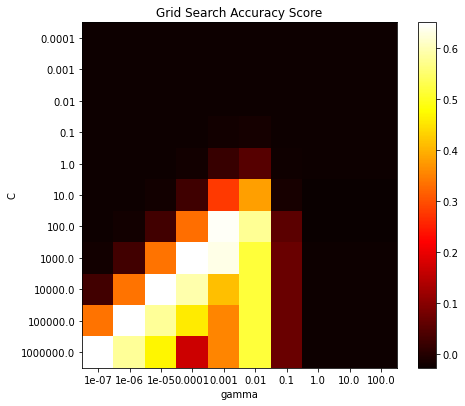

In [271]:
import matplotlib.pyplot as plt
import numpy as np
scores = gs.cv_results_['mean_test_score'][len(param_range):].reshape(len(param_range),len(param_range2))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma') # 1/(softness of decision boundary), i.e. small = soft
plt.ylabel('C')     # 1/(size of support vector margin), i.e. large = tight margin
plt.colorbar()
plt.xticks(np.arange(len(param_range2)), param_range2)
plt.yticks(np.arange(len(param_range)), param_range)
plt.title('Grid Search Accuracy Score')
plt.show()